In [1]:
import pandas as pd
import os
from typing import List

Data Loading

In [2]:

# Specify the directory path as a string
directory_path: str = 'data/231102'

# List to store the names of CSV files (each file name is a string)
csv_files: List[str] = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# List to hold DataFrame objects
all_data: List[pd.DataFrame] = []

# Iterate over the list of file names
for file_name in csv_files:
    file_path: str = os.path.join(directory_path, file_name)  # Construct full file path
    df: pd.DataFrame = pd.read_csv(file_path)  # Read CSV into DataFrame
    all_data.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_data: pd.DataFrame = pd.concat(all_data)

Data time 필드 변환

In [3]:
combined_data['time'] = pd.to_datetime(combined_data['time']) 

combined_data.head()

,time,device,mac_id,rss,sector_id,zone_id
0,2023-11-02 13:27:30,APPLE,4F-01-2A-82-06-FC,-75,13,13
0,2023-11-02 14:22:55,APPLE,61-1C-C7-A5-82-0E,-67,1,5
1,2023-11-02 14:23:00,APPLE,61-1C-C7-A5-82-0E,-65,1,5
2,2023-11-02 14:23:10,APPLE,61-1C-C7-A5-82-0E,-69,1,5
3,2023-11-02 14:23:20,APPLE,61-1C-C7-A5-82-0E,-79,10,10


Data filttering

In [4]:
specific_date = '2023-11-02'
start_time = '14:00:00'
end_time = '14:30:00'

filtered_data = combined_data[
    (combined_data['time'].dt.date == pd.to_datetime(specific_date).date()) &
    (combined_data['time'].dt.time >= pd.to_datetime(start_time).time()) &
    (combined_data['time'].dt.time <= pd.to_datetime(end_time).time())
]

filtered_data.head()

,time,device,mac_id,rss,sector_id,zone_id
0,2023-11-02 14:22:55,APPLE,61-1C-C7-A5-82-0E,-67,1,5
1,2023-11-02 14:23:00,APPLE,61-1C-C7-A5-82-0E,-65,1,5
2,2023-11-02 14:23:10,APPLE,61-1C-C7-A5-82-0E,-69,1,5
3,2023-11-02 14:23:20,APPLE,61-1C-C7-A5-82-0E,-79,10,10
4,2023-11-02 14:23:25,APPLE,61-1C-C7-A5-82-0E,-73,1,5


mac 갯수확인

In [5]:
mac_counts = filtered_data.groupby('mac_id').size()

# Convert the Series to a dictionary (optional)
mac_counts_dict = mac_counts.to_dict()
mac_counts_dict.__len__()

1449

5분 이상 머무른 mac

In [6]:
filtered_mac_counts_dict = {key: value for key, value in mac_counts_dict.items() if value >= 120}
filtered_mac_counts_dict.__len__()

364

In [7]:
mac_addresses_to_keep = list(filtered_mac_counts_dict.keys())

filtered_data = filtered_data[filtered_data['mac_id'].isin(mac_addresses_to_keep)]

In [8]:
grouped = filtered_data.groupby('mac_id')['zone_id'].apply(set)

# Convert to dictionary
mac_id_to_zone_id_dict = grouped.to_dict()

mac_id_to_zone_id_dict.__len__()

364

존을 15개 이상 들른 맥

In [9]:
filtered_mac_id_to_zone_id_dict = {
    mac_id: zone_ids
    for mac_id, zone_ids in mac_id_to_zone_id_dict.items()
    if len(zone_ids) >= 15
}
filtered_mac_id_to_zone_id_dict.__len__()

28

In [10]:
mac_ids_to_keep = list(filtered_mac_id_to_zone_id_dict.keys())

filtered_data = filtered_data[filtered_data['mac_id'].isin(mac_ids_to_keep)]

filtered_data.head()

,time,device,mac_id,rss,sector_id,zone_id
0,2023-11-02 14:12:35,APPLE,60-7E-07-46-8C-FE,-77,22,21
1,2023-11-02 14:12:45,APPLE,60-7E-07-46-8C-FE,-76,22,21
2,2023-11-02 14:13:00,APPLE,60-7E-07-46-8C-FE,-74,23,21
3,2023-11-02 14:13:05,APPLE,60-7E-07-46-8C-FE,-74,22,21
4,2023-11-02 14:13:10,APPLE,60-7E-07-46-8C-FE,-69,22,21


In [11]:
pivot_df = filtered_data.pivot_table(index='time', columns='mac_id', values='zone_id', aggfunc='first')
pivot_df.head()

mac_id,41-0C-98-CD-F8-FC,44-0D-52-39-BF-27,4A-52-EC-3F-B0-20,4C-45-2E-A7-4F-79,53-52-C6-98-F4-69,53-D1-CB-64-69-25,57-68-20-E5-77-FA,58-CA-43-EE-3C-79,58-F1-D6-73-6F-E8,5C-1C-AF-22-36-49,...,6F-09-40-72-11-E2,6F-E5-46-4C-A3-14,70-C4-EE-7B-71-CA,72-C5-9D-49-DD-20,73-F2-6E-BD-D0-D5,77-30-7C-BB-CA-64,79-07-EB-BC-85-03,7A-07-C7-DC-A6-B1,7A-97-16-35-4D-F0,7C-B7-A5-BD-59-BB
time,,,,,,,,,,,,,,,,,,,,,
2023-11-02 14:00:00,14.0,NaN,9.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,7.0,3.0,NaN,NaN
2023-11-02 14:00:05,14.0,NaN,9.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2023-11-02 14:00:10,14.0,NaN,9.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2023-11-02 14:00:15,14.0,NaN,9.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2023-11-02 14:00:20,14.0,NaN,9.0,NaN,NaN,NaN,3.0,20.0,NaN,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN


In [12]:
# Number of columns in pivot_df
num_columns = len(pivot_df.columns)

# Create a list of integers [1, 2, 3, ..., num_columns]
new_column_names = list(range(1, num_columns + 1))

# Assign the new column names to pivot_df
pivot_df.columns = new_column_names

pivot_df

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
time,,,,,,,,,,,,,,,,,,,,,
2023-11-02 14:00:00,14.0,NaN,9.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,7.0,3.0,NaN,NaN
2023-11-02 14:00:05,14.0,NaN,9.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2023-11-02 14:00:10,14.0,NaN,9.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
2023-11-02 14:00:15,14.0,NaN,9.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2023-11-02 14:00:20,14.0,NaN,9.0,NaN,NaN,NaN,3.0,20.0,NaN,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-02 14:29:40,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN
2023-11-02 14:29:45,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN
2023-11-02 14:29:50,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN


In [13]:
zone_position_map = {
        1: (45, 45),
        2: (45, 119),
        3: (45, 193),
        4: (45, 267),
        5: (45, 341),
        6: (141, 45),
        7: (141, 119),
        8: (141, 193),
        9: (141, 267),
        10: (141, 341),
        11: (237, 45),
        12: (237, 119),
        13: (237, 193),
        14: (237, 267),
        15: (237, 341),
        16: (333, 45),
        17: (333, 119),
        18: (333, 193),
        19: (333, 267),
        20: (333, 341),
        21: (429, 45),
        22: (429, 119),
        23: (429, 193),
        23: (429, 267),
        24: (429, 341),
        25: (525, 45),
    }

In [14]:
transformed_df = pivot_df.map(lambda zone_id: zone_position_map.get(zone_id, None))
transformed_df

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
time,,,,,,,,,,,,,,,,,,,,,
2023-11-02 14:00:00,"(237, 267)",None,"(141, 267)",None,None,None,"(45, 193)",None,None,None,...,None,"(333, 341)",None,None,None,None,"(141, 119)","(45, 193)",None,None
2023-11-02 14:00:05,"(237, 267)",None,"(141, 267)",None,None,None,"(45, 193)",None,None,None,...,None,None,None,None,None,None,"(141, 119)",None,None,None
2023-11-02 14:00:10,"(237, 267)",None,"(141, 267)",None,None,None,"(45, 267)",None,None,None,...,None,None,None,None,None,None,"(141, 119)",None,None,None
2023-11-02 14:00:15,"(237, 267)",None,"(141, 267)",None,None,None,"(45, 193)",None,None,None,...,None,None,None,None,None,None,"(45, 193)",None,None,None
2023-11-02 14:00:20,"(237, 267)",None,"(141, 267)",None,None,None,"(45, 193)","(333, 341)",None,None,...,None,"(333, 341)",None,None,None,None,"(45, 193)",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-02 14:29:40,None,"(141, 45)",None,None,None,None,None,None,None,None,...,None,None,"(141, 45)","(141, 45)","(141, 45)",None,None,None,None,None
2023-11-02 14:29:45,None,"(141, 45)",None,None,None,None,None,None,None,None,...,None,None,"(141, 45)","(141, 45)","(141, 45)",None,None,None,None,None
2023-11-02 14:29:50,None,"(141, 45)",None,None,None,None,None,None,None,None,...,None,None,"(141, 45)","(141, 45)","(141, 45)",None,None,None,None,None


In [15]:
import numpy as np

def custom_resample_agg(array_like):
    # Filter out None values
    valid_coords = [coords for coords in array_like if coords != None]
    
    if not valid_coords:
        return None
    else:
        # Compute average of valid x and y coordinates
        avg_x = int(round(np.mean([coords[0] for coords in valid_coords]))) 
        avg_y = int(round(np.mean([coords[1] for coords in valid_coords])))
        return (avg_x, avg_y)

In [16]:
resampled_df = transformed_df.resample('1T').agg(custom_resample_agg)

resampled_df = resampled_df.bfill().ffill()

resampled_df.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
time,,,,,,,,,,,,,,,,,,,,,
2023-11-02 14:00:00,"(221, 242)","(237, 45)","(141, 273)","(333, 341)","(333, 267)","(189, 341)","(45, 230)","(333, 341)","(263, 119)","(237, 52)",...,"(141, 193)","(333, 304)","(237, 193)","(45, 267)","(189, 230)","(93, 138)","(69, 212)","(45, 193)","(141, 119)","(69, 156)"
2023-11-02 14:01:00,"(125, 113)","(237, 45)","(205, 230)","(333, 341)","(333, 267)","(189, 341)","(45, 267)","(141, 341)","(263, 119)","(237, 52)",...,"(141, 193)","(301, 279)","(237, 193)","(45, 267)","(189, 230)","(93, 138)","(45, 242)","(83, 282)","(141, 119)","(69, 156)"
2023-11-02 14:02:00,"(152, 78)","(237, 45)","(269, 94)","(141, 341)","(333, 267)","(189, 341)","(45, 258)","(237, 341)","(263, 119)","(237, 52)",...,"(157, 205)","(317, 255)","(237, 193)","(45, 267)","(189, 230)","(77, 70)","(55, 252)","(69, 341)","(141, 119)","(69, 64)"
2023-11-02 14:03:00,"(133, 119)","(237, 45)","(245, 218)","(285, 304)","(321, 267)","(189, 341)","(45, 223)","(333, 230)","(263, 119)","(228, 52)",...,"(149, 193)","(309, 304)","(237, 193)","(45, 267)","(189, 230)","(141, 60)","(45, 267)","(53, 341)","(141, 119)","(129, 64)"
2023-11-02 14:04:00,"(97, 193)","(237, 45)","(301, 286)","(208, 297)","(333, 294)","(189, 341)","(100, 246)","(177, 322)","(263, 119)","(263, 65)",...,"(149, 181)","(295, 282)","(237, 193)","(45, 267)","(189, 230)","(141, 76)","(141, 304)","(85, 341)","(237, 104)","(141, 111)"


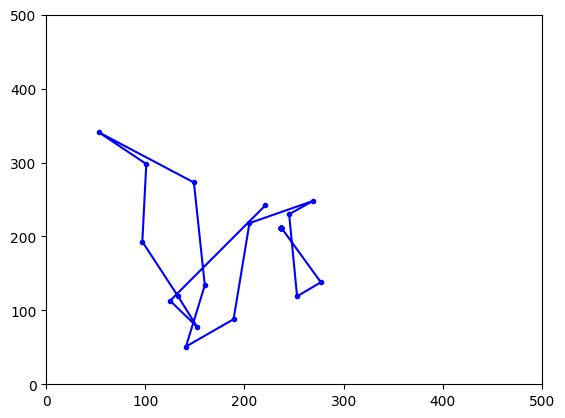

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation


# Assuming 'mac_id' is the MAC address you want to visualize
mac_id = 1  # replace with the actual MAC address

# Extract the coordinates for the specific MAC address
mac_data = resampled_df[mac_id].dropna()  # Drop any NaNs

# Extract x and y coordinates
x_coords, y_coords = zip(*mac_data)

# Noise parameters
mean = 0  # Mean of the noise
std_dev = 0  # Standard deviation of the noise

# Generate noise for x and y coordinates
noise_x = np.random.normal(mean, std_dev, len(x_coords))
noise_y = np.random.normal(mean, std_dev, len(y_coords))

# Add noise to the original coordinates
noisy_x_coords = [x + noise for x, noise in zip(x_coords, noise_x)]
noisy_y_coords = [y + noise for y, noise in zip(y_coords, noise_y)]

fig, ax = plt.subplots()
ax.set_xlim([0, 500])  # Adjust these limits based on your data range
ax.set_ylim([0, 500])

x, y = [], []

line, = ax.plot([], [], 'b.-')  # Initialize a line plot

def init():
    line.set_data([], [])
    return line,

def animate(frame):
    x.append(noisy_x_coords[frame])
    y.append(noisy_y_coords[frame])
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=len(x_coords), interval=1000, blit=True)

anim.save('animation.gif', writer='pillow')

plt.show()


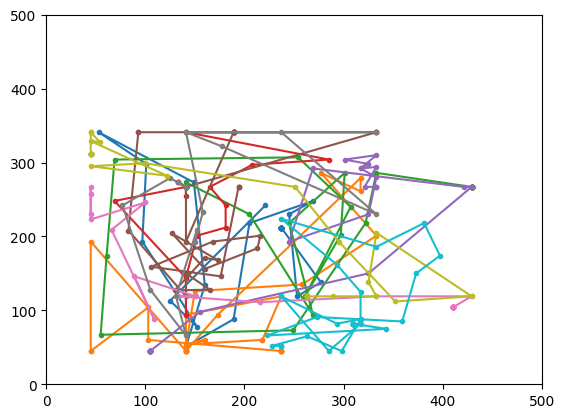

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation

noisy_coords_list = []
num_macs = 10  # Number of lines to plot


for idx in range(num_macs):
    # Extract data for this MAC address
    mac_data = resampled_df[idx + 1].dropna()
    x_coords, y_coords = zip(*mac_data)

    # Generate and apply noise
    noise_x = np.random.normal(mean, std_dev, len(x_coords))
    noise_y = np.random.normal(mean, std_dev, len(y_coords))
    noisy_x_coords = [x + noise for x, noise in zip(x_coords, noise_x)]
    noisy_y_coords = [y + noise for y, noise in zip(y_coords, noise_y)]

    noisy_coords_list.append((noisy_x_coords, noisy_y_coords))
    
fig, ax = plt.subplots()
ax.set_xlim([0, 500])  # Adjust based on data range
ax.set_ylim([0, 500])
lines = [ax.plot([], [], '.-')[0] for _ in range(num_macs)]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(frame):
    for idx, line in enumerate(lines):
        noisy_x_coords, noisy_y_coords = noisy_coords_list[idx]

        if frame < len(noisy_x_coords):
            line.set_data(noisy_x_coords[:frame + 1], noisy_y_coords[:frame + 1])

    return lines

anim = FuncAnimation(fig, animate, init_func=init, frames= len(noisy_coords_list[0][0]) , interval=1000, blit=True)
anim.save('animation_1.gif', writer='pillow')
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


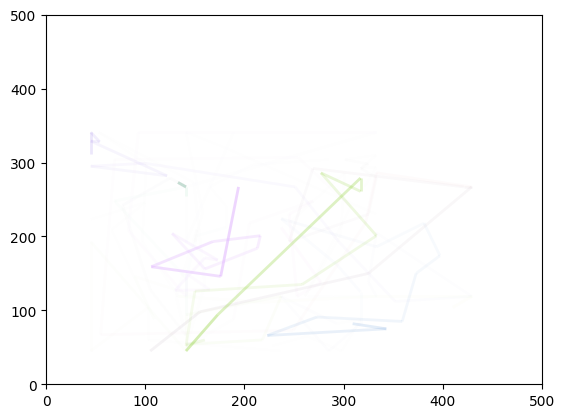

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors

noisy_coords_list = []
num_macs = 10  # Number of lines to plot
colors = [mcolors.to_hex([np.random.random() for _ in range(3)]) for _ in range(num_macs)]
initial_dots = [None] * num_macs

for idx in range(num_macs):
    # Extract data for this MAC address
    mac_data = resampled_df[idx + 1].dropna()
    x_coords, y_coords = zip(*mac_data)

    # Generate and apply noise
    noise_x = np.random.normal(mean, std_dev, len(x_coords))
    noise_y = np.random.normal(mean, std_dev, len(y_coords))
    noisy_x_coords = [x + noise for x, noise in zip(x_coords, noise_x)]
    noisy_y_coords = [y + noise for y, noise in zip(y_coords, noise_y)]

    noisy_coords_list.append((noisy_x_coords, noisy_y_coords))
    
fig, ax = plt.subplots()
ax.set_xlim([0, 500])  # Adjust based on data range
ax.set_ylim([0, 500])

line_collections = [[] for _ in range(num_macs)]

def init():
    return []

def animate(frame):
    print(frame)
    for idx in range(num_macs):
        noisy_x_coords, noisy_y_coords = noisy_coords_list[idx]
        color = colors[idx] 

        # Handle the first frame
        if frame == 0 and len(noisy_x_coords) > 0:
            initial_dots[idx], = ax.plot(noisy_x_coords[0], noisy_y_coords[0], '.', color=color)

        # Handle subsequent frames
        else:
            if initial_dots[idx] is not None:
                initial_dots[idx].remove()
                initial_dots[idx] = None
        
            if frame > 0 and frame < len(noisy_x_coords) - 1:
                points = np.array([[noisy_x_coords[frame - 1], noisy_y_coords[frame - 1]], 
                                [noisy_x_coords[frame], noisy_y_coords[frame]]])
                lc = LineCollection([points], linewidths=2, color=color, alpha=1)
                ax.add_collection(lc)
                line_collections[idx].append(lc)

            # Gradually reduce the alpha of existing segments
            for lc in line_collections[idx]:
                lc.set_alpha(lc.get_alpha() * 0.8)

    return [lc for lcs in line_collections for lc in lcs]

anim = FuncAnimation(fig, animate, init_func=init, frames= len(noisy_coords_list[0][0]) , interval=1000, blit=True)
anim.save('animation_2.gif', writer='pillow')
plt.show()